In [3]:
# to save complex objects 
import pickle 
import pandas as pd

# graphing 
import seaborn as sns
import matplotlib.pyplot as plt

# for PCA
from sklearn.decomposition import PCA
import numpy as np

EDA was conducted on btoh ndoe and edeg level features. The following was observed below: 

On the node level, the correlation matrix shows moderate relationships among features like time_portion, speaking_turns_proportion, and rate_of_speech, which suggests that these features are interrelated and may influence each other. Principal Component Analysis (PCA) reveals that the first two principal components, which together explain a significant portion of the variance, are primarily driven by time_portion, speaking_turns_proportion, average_word_rarity, and rate_of_speech, among others. These components capture the main variability in node behavior, with individual participants showing clusters of variability.

On the edge level, features like average_turns_between, LSM, and interruptions display more varied relationships. For example, nearly half of the average_turns_between values equal -1, indicating that ParticipantID never spoke after ParticipantTarget, while a significant number of interruptions are zero, showing no interruptions occurred between certain participants. The PCA on edge features suggests that average_turns_between, LSM, and interruptions contribute significantly to the variance in the data. 

We start by reading in the data 

In [4]:
# Load the graphs data from file
with open('data/graphs_cohesion_data_corrected_test.pkl', 'rb') as f:
    graphs_cohesion_data = pickle.load(f)

print(graphs_cohesion_data[0])

{'meeting': 'IS1006d', 'start': 1500.0, 'features': ({'A': [('time_portion', 0.4571015970098533), ('speaking_turns_proportion', 0.2926829268292683), ('rate_of_speech', 2.174317041442113), ('lexical_richness', 0.46153846153846156), ('positive_sentiment_proportion', 0.06818181818181818), ('negative_sentiment_proportion', 0.022727272727272728), ('average_word_rarity', 9.540409090909092e-05), ('first_person_pronoun_usage', 0.0), ('second_person_pronoun_usage', 0.017094017094017096), ('third_person_pronoun_usage', 0.0), ('agreement_words_proportion', 0.017094017094017096), ('disagreement_words_proportion', 0.017094017094017096)], 'B': [('time_portion', 0.20489296636085916), ('speaking_turns_proportion', 0.0975609756097561), ('rate_of_speech', 2.9436152570480507), ('lexical_richness', 0.647887323943662), ('positive_sentiment_proportion', 0.03333333333333333), ('negative_sentiment_proportion', 0.0), ('average_word_rarity', 0.0003074431822222222), ('first_person_pronoun_usage', 0.0), ('second_

Lets now create a df for node features

In [5]:
data_rows = []

# Loop through each graph entry in the dataset
for graph in graphs_cohesion_data:
    meeting = graph['meeting']
    start_time = graph['start']
    
    # Loop through the node features for each participant
    for participant, features in graph['features'][0].items():
        row = {'Meeting': meeting, 'ParticipantID': participant, 'Start Time': start_time}
        
        # Add the node features to the row
        for feature_name, feature_value in features:
            row[feature_name] = feature_value

        data_rows.append(row)

# Create a DataFrame from the rows
node_features_df = pd.DataFrame(data_rows)


In [6]:
# saving for use in ML models 
node_features_df.to_pickle('data/node_features_df.pkl')

Below we show the df and its descriptive stats 

In [7]:
node_features_df.head()

,Meeting,ParticipantID,Start Time,time_portion,speaking_turns_proportion,rate_of_speech,lexical_richness,positive_sentiment_proportion,negative_sentiment_proportion,average_word_rarity,first_person_pronoun_usage,second_person_pronoun_usage,third_person_pronoun_usage,agreement_words_proportion,disagreement_words_proportion
0,IS1006d,A,1500.0,0.457102,0.292683,2.174317,0.461538,0.068182,0.022727,0.000095,0.00000,0.017094,0.000000,0.017094,0.017094
1,IS1006d,B,1500.0,0.204893,0.097561,2.943615,0.647887,0.033333,0.000000,0.000307,0.00000,0.014085,0.000000,0.000000,0.056338
2,IS1006d,C,1500.0,0.182127,0.097561,3.358209,0.611111,0.036364,0.000000,0.000224,0.00000,0.013889,0.000000,0.055556,0.013889
3,IS1006d,D,1500.0,0.507900,0.512195,2.960361,0.536723,0.064286,0.000000,0.000246,0.00565,0.000000,0.016949,0.062147,0.045198
4,IS1007b,A,60.0,0.570799,0.312500,2.054073,0.555556,0.009615,0.009615,0.000301,0.00000,0.025641,0.000000,0.034188,0.008547


In [8]:
node_features_df.describe()

,Start Time,time_portion,speaking_turns_proportion,rate_of_speech,lexical_richness,positive_sentiment_proportion,negative_sentiment_proportion,average_word_rarity,first_person_pronoun_usage,second_person_pronoun_usage,third_person_pronoun_usage,agreement_words_proportion,disagreement_words_proportion
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,925.680000,0.262131,0.247500,3.313797,0.572057,0.043468,0.008594,0.000244,0.002130,0.020448,0.002502,0.039632,0.014582
std,582.066475,0.223719,0.195603,1.646069,0.214958,0.071983,0.030582,0.000189,0.010452,0.023981,0.007166,0.042516,0.022979
min,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,450.000000,0.088665,0.090909,2.787519,0.502700,0.008234,0.000000,0.000147,0.000000,0.000000,0.000000,0.014871,0.000000
50%,885.000000,0.216471,0.227273,3.296963,0.584603,0.030303,0.000000,0.000251,0.000000,0.013987,0.000000,0.035089,0.006849
75%,1395.000000,0.382476,0.365320,3.898047,0.674109,0.051910,0.009177,0.000323,0.000000,0.034091,0.000000,0.053955,0.021224
max,2160.000000,0.981352,1.000000,18.181818,1.000000,1.000000,0.500000,0.002950,0.166667,0.142857,0.083333,0.500000,0.200000


Lets observe correlations between these features. 

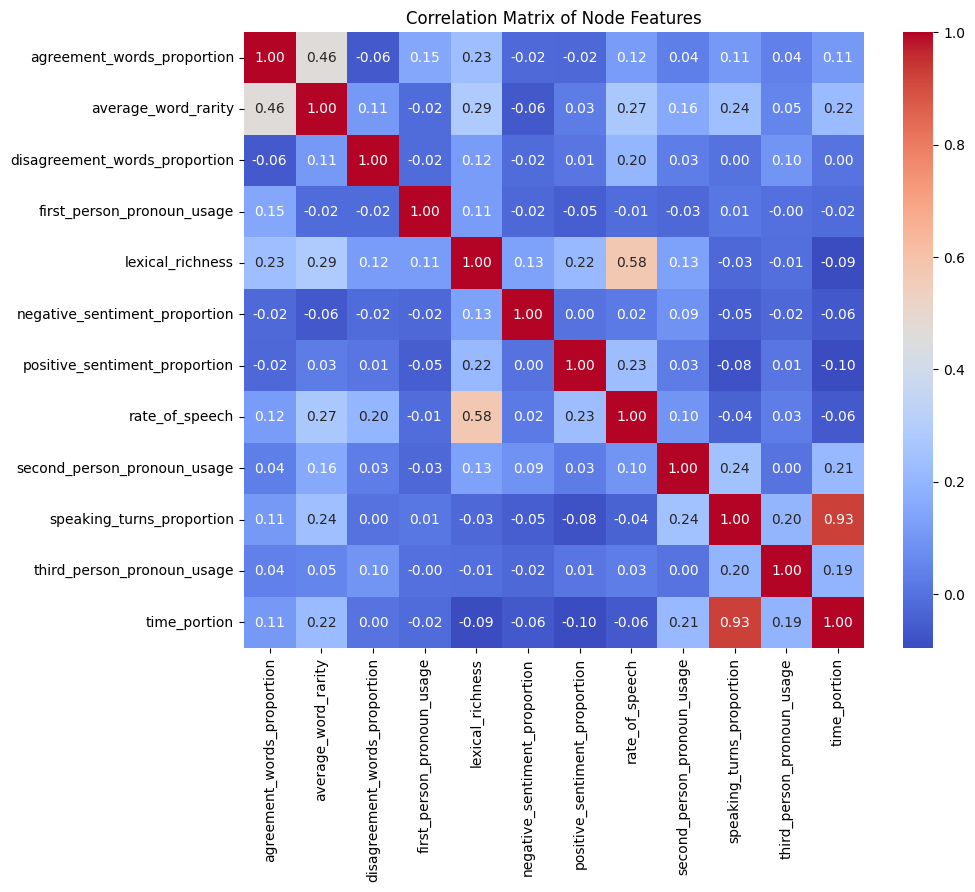

In [9]:
feature_columns = node_features_df.columns.difference(['Meeting', 'ParticipantID', 'Start Time'])

# Generate the correlation matrix
correlation_matrix = node_features_df[feature_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Node Features')
plt.show()

Lets now perform PCA on these features 

In [10]:
feature_columns = node_features_df.columns.difference(['Meeting', 'ParticipantID', 'Start Time'])

# Standardize the data 
from sklearn.preprocessing import StandardScaler
X = node_features_df[feature_columns].values
X_scaled = StandardScaler().fit_transform(X)

# Perform PCA to reduce to 2 principal components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Add the PCA results back to the DataFrame
node_features_df['PCA1'] = pca_result[:, 0]
node_features_df['PCA2'] = pca_result[:, 1]

We color the features representing the same pariticpant the same color to see if they generally act the same throughout segments.  

In [11]:
# Combine 'Meeting' and 'ParticipantID' to a new column for coloring
node_features_df['Meeting_Participant'] = node_features_df['Meeting'] + '_' + node_features_df['ParticipantID'].astype(str)

Below we output the PCA. There are no obsvious clusters at first sight. 

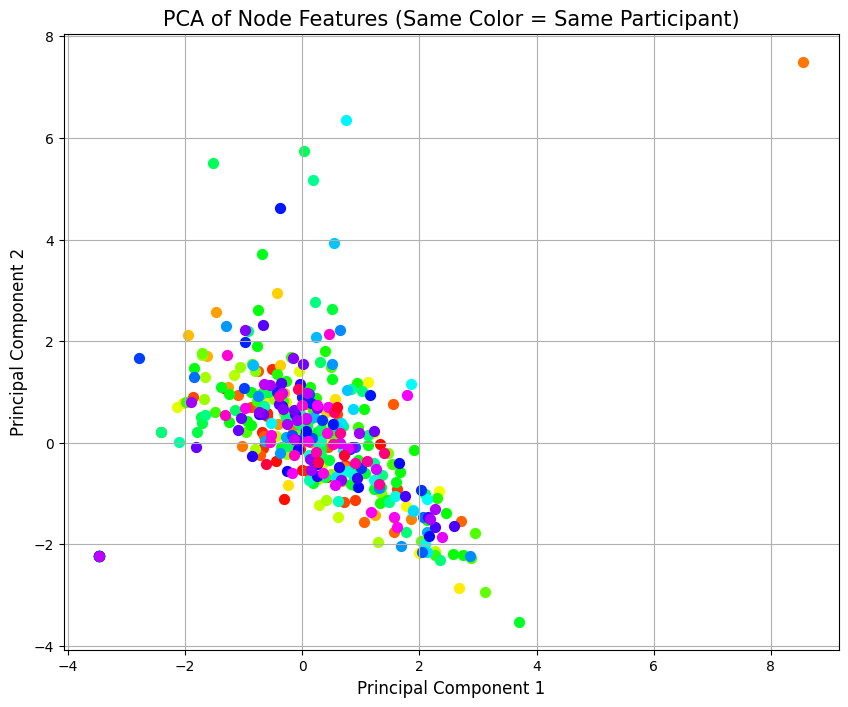

In [12]:
unique_ids = node_features_df['Meeting_Participant'].unique()
palette = sns.color_palette("hsv", len(unique_ids))
color_dict = dict(zip(unique_ids, palette))

# Create a scatter plot of the PCA results
plt.figure(figsize=(10, 8))

# Iterate through the unique combinations of Meeting and ParticipantID
for meeting_participant in unique_ids:
    subset = node_features_df[node_features_df['Meeting_Participant'] == meeting_participant]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=meeting_participant, 
                color=color_dict[meeting_participant], s=50)

# Add titles and labels
plt.title('PCA of Node Features (Same Color = Same Participant)', fontsize=15)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(True)
plt.show()


Below we output the linear combination for each component. 

The first component finds variability in portion of time spoken and speaking turns proportion, which are closley correlated. 

The second component find variability in lexical richness and rate of speech, which are also correlated. 

This could leads me to postulate that different participant profiles can stem from a mix of thse two components. Will these profiles align with cohesion profiles though? 

In [13]:
# Get the components and the feature names
components = pca.components_
features = feature_columns  # This is the list of node features

# Print the sorted linear combination for each principal component
for i, component in enumerate(components):
    # Combine features and coefficients and sort by absolute value of the coefficients
    sorted_component = sorted(zip(features, component), key=lambda x: abs(x[1]), reverse=True)
    
    print(f"\nPrincipal Component {i + 1}:")
    for feature, coef in sorted_component:
        print(f"{feature}: {coef:.4f}")



Principal Component 1:
speaking_turns_proportion: 0.5149
time_portion: 0.4988
average_word_rarity: 0.4213
agreement_words_proportion: 0.3002
second_person_pronoun_usage: 0.2720
lexical_richness: 0.2278
rate_of_speech: 0.2154
third_person_pronoun_usage: 0.1858
disagreement_words_proportion: 0.0943
first_person_pronoun_usage: 0.0389
negative_sentiment_proportion: -0.0324
positive_sentiment_proportion: 0.0141

Principal Component 2:
lexical_richness: 0.5229
rate_of_speech: 0.4996
time_portion: -0.3818
speaking_turns_proportion: -0.3528
positive_sentiment_proportion: 0.2844
average_word_rarity: 0.2112
agreement_words_proportion: 0.1807
disagreement_words_proportion: 0.1592
negative_sentiment_proportion: 0.1015
third_person_pronoun_usage: -0.0975
first_person_pronoun_usage: 0.0577
second_person_pronoun_usage: 0.0084


We no create a similar df but for edge features. 

In [14]:

rows = []

# Iterate over each graph in graphs_cohesion_data
for graph in graphs_cohesion_data:
    meeting = graph['meeting']
    start_time = graph['start']
    _, edge_features = graph['features']

    # Iterate over the edge features 
    for participants, features in edge_features.items():
        participant_id, participant_target = participants.split(',')

        # Create a dictionary for each edge
        row = {
            'Meeting': meeting,
            'ParticipantID': participant_id,
            'ParticipantTarget': participant_target,
            'Start Time': start_time
        }

        # Add edge features 
        for feature_name, feature_value in features:
            row[feature_name] = feature_value

        rows.append(row)

edge_features_df = pd.DataFrame(rows)


Below we ouput the df and its descriptive stats 

In [15]:
edge_features_df.head(5)

,Meeting,ParticipantID,ParticipantTarget,Start Time,LSM,interruptions,average_turns_between
0,IS1006d,A,B,1500.0,0.452178,0.000000,0.019608
1,IS1006d,A,C,1500.0,0.496090,0.055556,0.039216
2,IS1006d,A,D,1500.0,0.502936,0.333333,0.098039
3,IS1006d,B,A,1500.0,0.452178,0.111111,0.000000
4,IS1006d,B,C,1500.0,0.554509,0.000000,0.000000


In [16]:
edge_features_df.describe()

,Start Time,LSM,interruptions,average_turns_between
count,1200.000000,1200.000000,1200.000000,1200.000000
mean,925.680000,0.419903,0.082500,0.034319
std,581.580812,0.248367,0.123060,0.045291
min,60.000000,0.000010,0.000000,0.000000
25%,450.000000,0.222252,0.000000,0.000000
50%,885.000000,0.438730,0.043478,0.022222
75%,1395.000000,0.604070,0.130435,0.053571
max,2160.000000,1.000000,1.000000,0.400000


Below we ouput correlations between edge features. There are no noticeable correlations (this might be to the number of -1's for averaged_between etc.)

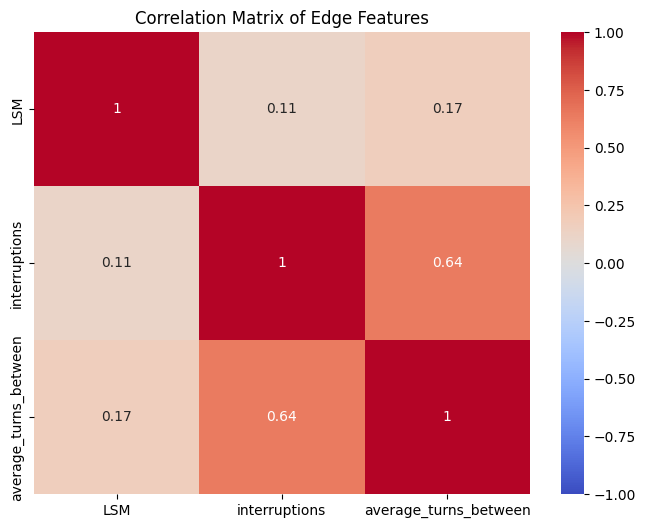

In [17]:
# Select only the feature columns from the edge_features_df (ignoring identifiers)
edge_feature_columns = ['LSM', 'interruptions', 'average_turns_between']
edge_feature_data = edge_features_df[edge_feature_columns]

# Calculate the correlation matrix
correlation_matrix = edge_feature_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Edge Features')
plt.show()

I honestly dont know how there are nans

In [49]:
# Drop rows that have NaN values in any of the edge feature columns
edge_features_df = edge_features_df.dropna(subset=edge_features)

Lets now coduct PCA on edge features. Coloring edges from the same participant to the same target the same color. 

In [19]:

edge_features = ['LSM', 'interruptions', 'average_turns_between']

# Standardize the features 
scaler = StandardScaler()
scaled_features = scaler.fit_transform(edge_features_df[edge_features])

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Create a new DataFrame to store PCA results along with identifiers
pca_df = pd.DataFrame(data=pca_result, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Meeting'] = edge_features_df['Meeting']
pca_df['ParticipantID'] = edge_features_df['ParticipantID']
pca_df['ParticipantTarget'] = edge_features_df['ParticipantTarget']

# Combine 'Meeting', 'ParticipantID', and 'ParticipantTarget' into a unique identifier
pca_df['Group'] = pca_df['Meeting'] + '-' + pca_df['ParticipantID'] + '-' + pca_df['ParticipantTarget']

the -1s for average_turns seems to standing out. I should probably fix this. 

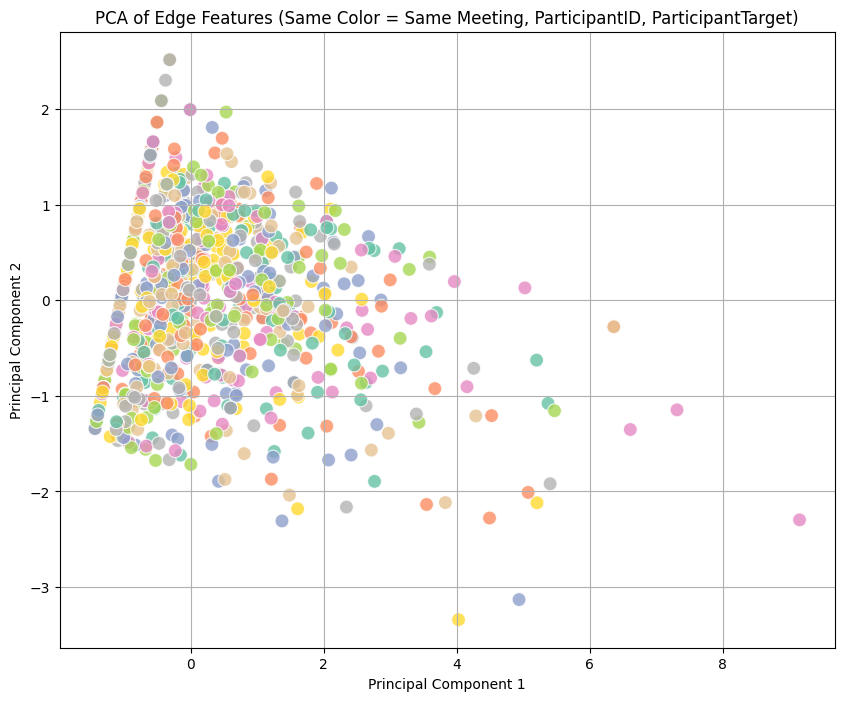

In [20]:

# Plot PCA results, coloring by 'Group'
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Principal Component 1', 
    y='Principal Component 2', 
    hue='Group', 
    palette='Set2', 
    data=pca_df, 
    legend=None,  # Removing legend if too many groups, can be enabled if needed
    s=100, alpha=0.8
)

plt.title('PCA of Edge Features (Same Color = Same Meeting, ParticipantID, ParticipantTarget)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


There seem to be two substantive components, bt I still believe the -1's are playing to big a role. 

In [21]:
# Get the components and the feature names
components = pca.components_
features = ['LSM', 'interruptions', 'average_turns_between']  

# Print the sorted linear combination for each principal component
for i, component in enumerate(components):
    # Combine features and coefficients and sort by absolute value of the coefficients
    sorted_component = sorted(zip(features, component), key=lambda x: abs(x[1]), reverse=True)
    
    print(f"\nPrincipal Component {i + 1}:")
    for feature, coef in sorted_component:
        print(f"{feature}: {coef:.4f}")


Principal Component 1:
average_turns_between: 0.6852
interruptions: 0.6728
LSM: 0.2790

Principal Component 2:
LSM: 0.9578
interruptions: -0.2459
average_turns_between: -0.1486


Here we can see ho many -1s there are for average_turns. These might be misinterepreted, because it is closer to a low number of turns in between than a high number of terms inbetween, which makes no sense, as -1 means that one speaker never spoke after anoither, such that the scenario isnt applicable. 

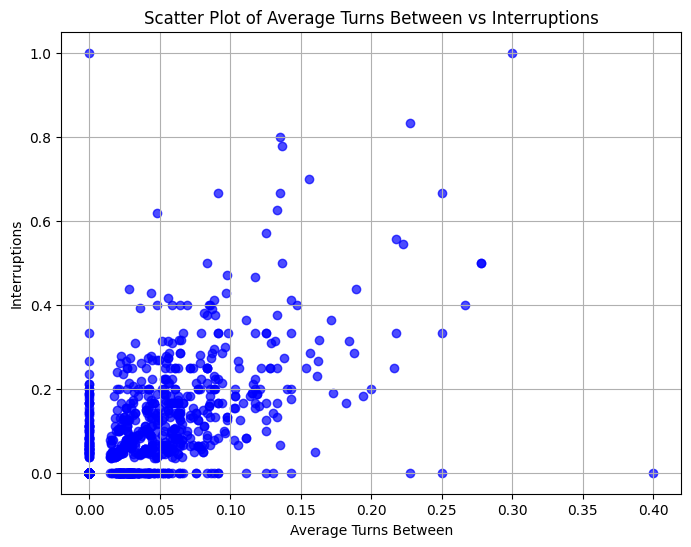

In [22]:
# Assuming your DataFrame is named 'edge_features_df'
# Scatter plot of average_turns_between vs interruptions
plt.figure(figsize=(8, 6))
plt.scatter(edge_features_df['average_turns_between'], edge_features_df['interruptions'], alpha=0.7, color='blue')

# Adding titles and labels
plt.title('Scatter Plot of Average Turns Between vs Interruptions')
plt.xlabel('Average Turns Between')
plt.ylabel('Interruptions')

# Display the plot
plt.grid(True)
plt.show()